<div dir="rtl">
    
# 02. تصنيف الشبكات العصبية باستخدام TensorFlow

##### حسنًا، لقد رأينا كيفية التعامل مع مشكلة الانحدار في TensorFlow، فلنلقِ نظرة على كيفية التعامل مع مشكلة التصنيف.

##### يتضمن [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) التنبؤ بما إذا كان الشيء شيئًا أم آخر.

##### على سبيل المثال، قد ترغب في:
* توقع ما إذا كان شخص ما مصابًا بأمراض القلب أم لا بناءً على معاييره الصحية. وهذا ما يسمى **التصنيف الثنائي** نظرًا لوجود خيارين فقط.
* قرر ما إذا كانت الصورة عبارة عن طعام أو شخص أو كلب. وهذا ما يسمى **التصنيف متعدد الفئات** نظرًا لوجود أكثر من خيارين.
* توقع الفئات التي يجب تخصيصها لمقالة ويكيبيديا. وهذا ما يسمى **التصنيف متعدد التصنيفات** نظرًا لأن المقالة الواحدة يمكن أن تحتوي على أكثر من فئة معينة.

##### في هذا الدفتر، سنعمل على حل عدد من مشكلات التصنيف المختلفة باستخدام TensorFlow. بمعنى آخر، أخذ مجموعة من المدخلات والتنبؤ بالفئة التي تنتمي إليها هذه المجموعة من المدخلات.

## ما سنغطيه

##### على وجه التحديد، سنقوم بما يلي باستخدام TensorFlow:
- معمارية نموذج التصنيف
- أشكال الإدخال وأشكال الإخراج
- `X`: الميزات/البيانات (المدخلات)
- `y`: التسميات (المخرجات)
- "ما هي الفئة التي تنتمي إليها المدخلات؟"
- إنشاء بيانات مخصصة لعرضها وملاءمتها
- خطوات نمذجة التصنيف الثنائي ومتعدد الفئات
- إنشاء نموذج
- تجميع النموذج
- تعريف دالة الخسارة
- إعداد محسن
- إيجاد أفضل معدل للتعلم
- إنشاء مقاييس التقييم
- تركيب نموذج (الحصول على أنماط في بياناتنا)
- تحسين النموذج
- قوة اللاخطية
- تقييم نماذج التصنيف
- تصور النموذج ("تصور، تصور، تصور")
- النظر إلى منحنيات التدريب
- مقارنة التوقعات بالحقيقة الأساسية (باستخدام مقاييس التقييم لدينا)

## كيف يمكنك استخدام هذا الدفتر

##### يمكنك قراءة الأوصاف والتعليمات البرمجية (يجب تشغيلها كلها، باستثناء الخلايا التي تخطئ عن قصد)، ولكن هناك خيار أفضل.

##### اكتب كل الكود بنفسك.

##### نعم. أنا جادة. قم بإنشاء دفتر ملاحظات جديد، وأعد كتابة كل سطر بنفسك. تحقق منه، وانظر إذا كان بإمكانك كسره، فلماذا ينكسر؟

##### لا يتعين عليك كتابة أوصاف النص ولكن كتابة الكود بنفسك تعد طريقة رائعة للحصول على خبرة عملية.

##### لا تقلق إذا ارتكبت أخطاء، فكلنا نفعل ذلك. الطريقة للتحسن وارتكاب أخطاء أقل هي **كتابة المزيد من التعليمات البرمجية**.

<div dir="rtl">

## البنية النموذجية لتصنيف الشبكة العصبية

##### كلمة *نموذجي* مقصودة.

##### لأن بنية الشبكة العصبية التصنيفية يمكن أن تختلف بشكل كبير اعتمادًا على المشكلة التي تعمل عليها.

##### ومع ذلك، هناك بعض الأساسيات التي تحتوي عليها جميع الشبكات العصبية العميقة:
* طبقة الإدخال.
* بعض الطبقات المخفية.
* طبقة الإخراج.

##### يعود جزء كبير من الباقي إلى محلل البيانات الذي يقوم بإنشاء النموذج.

##### فيما يلي بعض القيم القياسية التي ستستخدمها غالبًا في تصنيف الشبكات العصبية الخاصة بك.

| **المعلمة التشعبية** | **التصنيف الثنائي** | **تصنيف متعدد الفئات** |
| --- | --- | --- |
| شكل طبقة الإدخال | نفس عدد الميزات (على سبيل المثال، 5 للعمر والجنس والطول والوزن وحالة التدخين في التنبؤ بأمراض القلب) | نفس التصنيف الثنائي |
| الطبقة (الطبقات) المخفية | مشكلة محددة، الحد الأدنى = 1، الحد الأقصى = غير محدود | نفس التصنيف الثنائي |
| الخلايا العصبية لكل طبقة مخفية | مشكلة محددة، بشكل عام من 10 إلى 100 | نفس التصنيف الثنائي |
| شكل طبقة الإخراج | 1 (فئة أو أخرى) | 1 لكل فصل (على سبيل المثال 3 للطعام أو صورة الشخص أو الكلب) |
| تفعيل مخفي | عادة [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (وحدة خطية مصححة) | نفس التصنيف الثنائي |
| تفعيل الإخراج | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) |
| دالة الخسارة | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) في TensorFlow) | الإنتروبيا المتقاطعة ([Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) في TensorFlow) |
| محسن | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (نسب التدرج العشوائي)، [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) | نفس التصنيف الثنائي |

##### ***الجدول 1:*** *البنية النموذجية لشبكة التصنيف.* ***المصدر:*** *مقتبس من الصفحة 295 من [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

##### لا تقلق إذا لم يكن الكثير مما سبق منطقيًا في الوقت الحالي، فسنحصل على الكثير من الخبرة أثناء تصفحنا لهذا دفتر الملاحظات.

##### لنبدأ باستيراد TensorFlow باعتباره الاسم المستعار الشائع "tf". بالنسبة لهذا الكمبيوتر الدفتري، تأكد من أنك تستخدم الإصدار 2.x+.

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


In [5]:
import tensorflow as tf
# Define GPU settings
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Create a TensorFlow session that uses both GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Visualization is computationally expensive and can't run alongside model training.
        print(e)

3 Physical GPUs, 3 Logical GPUs


In [6]:
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'   CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = '1'     GPU 1

import tensorflow as tf
print(tf.__version__)

2.10.0


<div dir="rtl">

## إنشاء البيانات لعرضها وملاءمتها

##### يمكننا أن نبدأ باستيراد مجموعة بيانات التصنيف ولكن دعونا نتدرب على إنشاء بعض بيانات التصنيف الخاصة بنا.

##### > 🔑 **ملاحظة:** من الممارسات الشائعة أن يتم إعداد نموذج لك للعمل على مجموعة بيانات لعبة (أو بسيطة) قبل الانتقال إلى مشكلتك الفعلية. تعامل معها كتجربة إعادة قبل التجربة (التجارب) الفعلية.

##### نظرًا لأن التصنيف يتنبأ بما إذا كان شيء ما شيئًا أو آخر، فلنقم بإعداد بعض البيانات لتعكس ذلك.

##### للقيام بذلك، سنستخدم وظيفة [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) الخاصة بـ Scikit-Learn.



In [7]:
import random
from sklearn.datasets import make_circles
import numpy as np 

tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

<div dir="rtl">

##### رائع، لقد أنشأنا الآن بعض البيانات، فلنلقِ نظرة على الميزات (`X`) والتسميات (`y`).

In [8]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

<div dir="rtl">

#####    حسنًا، لقد رأينا بعض البيانات والتسميات الخاصة بنا، ما رأيك أن ننتقل نحو التصور؟

##### > 🔑 **ملاحظة:** إحدى الخطوات المهمة لبدء أي نوع من مشاريع التعلم الآلي هي [become one with the data](https://karpathy.github.io/2019/04/25/recipe/). وإحدى أفضل الطرق للقيام بذلك هي تصور البيانات التي تعمل بها قدر الإمكان. شعار مستكشف البيانات هو "تصور، تصور، تصور".

##### سنبدأ مع DataFrame.

In [10]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


<div dir="rtl">

ما نوع العلامات التي نتعامل معها؟

In [11]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

<div dir="rtl">

##### حسنًا، يبدو أننا نتعامل مع مشكلة **التصنيف الثنائي**. إنه ثنائي نظرًا لوجود علامتين فقط (0 أو 1).

##### إذا كان هناك المزيد من خيارات التصنيف (على سبيل المثال 0، 1، 2، 3 أو 4)، فسيتم تسميتها **تصنيف متعدد الفئات**.

##### لنأخذ تصورنا خطوة أخرى إلى الأمام ونرسم بياناتنا.

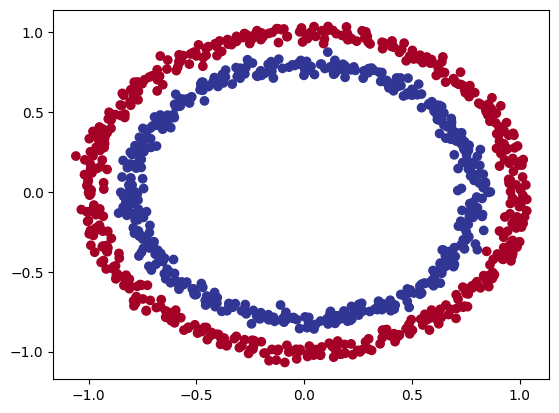

In [12]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

<div dir="rtl">

##### لطيف - جيد! من خلال الحبكة، هل يمكنك تخمين نوع النموذج الذي قد نرغب في بنائه؟ 

##### ماذا عن محاولة بناء واحدة لتصنيف النقاط الزرقاء أو الحمراء؟ كما هو الحال في نموذج قادر على التمييز بين النقاط الزرقاء والحمراء.

##### > 🛠 **التدريب:** قبل المضي قدمًا، قد ترغب في قضاء 10 دقائق في اللعب باستخدام [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true). حاول ضبط المعلمات الفائقة المختلفة التي تراها وانقر فوق تشغيل لرؤية قطار الشبكة العصبية. أعتقد أنك ستجد البيانات مشابهة جدًا لما أنشأناه للتو.

<div dir="rtl">

## أشكال الإدخال والإخراج

##### إحدى المشكلات الأكثر شيوعًا التي ستواجهها عند بناء الشبكات العصبية هي عدم تطابق الأشكال.

##### وبشكل أكثر تحديدًا، شكل البيانات المدخلة وشكل البيانات المخرجة.

##### في حالتنا، نريد إدخال `X` وجعل نموذجنا يتنبأ بـ `Y`.

##### لذلك دعونا نتحقق من شكلي `X` و`Y`.

In [13]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

<div dir="rtl">

 حسنًا، من أين تأتي هذه الأرقام؟

In [14]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

<div dir="rtl">

 إذن لدينا عدد من قيم "X" بقدر ما لدينا من قيم "y"، وهذا أمر منطقي.

دعونا نتحقق من مثال واحد لكل منهما.

In [15]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

<div dir="rtl">

##### حسنًا، لدينا ميزتان "X" تؤديان إلى قيمة "y" واحدة.

##### هذا يعني أن شكل إدخال شبكتنا العصبية يجب أن يقبل موترًا ذو بُعد واحد على الأقل هو بعدان ويخرج موترًا بقيمة واحدة على الأقل. 

##### > 🤔 **ملاحظة:** قد يبدو وجود شكل (1000) محيرًا. ومع ذلك، هذا لأن جميع قيم `y` هي في الواقع عددية (قيم فردية) وبالتالي لا تحتوي على بُعد. في الوقت الحالي، فكر في شكل الإخراج الخاص بك باعتباره على الأقل نفس القيمة كمثال واحد لـ `y` (في حالتنا، يجب أن يكون الناتج من شبكتنا العصبية قيمة واحدة على الأقل).

<div dir="rtl">

## خطوات النمذجة

##### الآن بعد أن عرفنا ما هي البيانات التي لدينا بالإضافة إلى أشكال المدخلات والمخرجات، دعونا نرى كيف يمكننا بناء شبكة عصبية لنمذجتها.

##### في TensorFlow، هناك عادةً 3 خطوات أساسية لإنشاء نموذج وتدريبه.

1. **إنشاء نموذج** - قم بتجميع طبقات الشبكة العصبية بنفسك (باستخدام [functional](https://www.tensorflow.org/guide/keras/functional) أو [functional](https://www.tensorflow.org/guide/keras/functional)) أو قم باستيراد نموذج تم إنشاؤه مسبقًا (المعروف باسم نقل التعلم).
2. **تجميع نموذج** - تحديد كيفية قياس أداء النموذج (الخسارة/المقاييس) بالإضافة إلى تحديد كيفية تحسينه (المُحسِّن).
3. **ملاءمة النموذج** - السماح للنموذج بمحاولة العثور على أنماط في البيانات (كيف يصل `X` إلى `y`).

##### دعونا نرى ذلك عمليًا باستخدام Sequential API لبناء نموذج لبيانات الانحدار الخاصة بنا. وبعد ذلك سننتقل إلى كل منها.

In [16]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.7580 - accuracy: 0.4830
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.4177 - accuracy: 0.5030
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 3.2626 - accuracy: 0.5070
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 1.5712 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.4920


<div dir="rtl">

#####    بالنظر إلى مقياس الدقة، فإن أداء نموذجنا ضعيف (دقة 50% في مشكلة التصنيف الثنائي تعادل التخمين)، ولكن ماذا لو قمنا بتدريبه لفترة أطول؟

In [17]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 980us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

<div dir="rtl">

##### حتى بعد مرور 200 تمريرة للبيانات، فإنه لا يزال يعمل كما لو كان تخمينًا.

##### ماذا لو أضفنا طبقة إضافية وتدربنا لفترة أطول قليلاً؟  

In [18]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [19]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 946us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

<div dir="rtl">

 لا تزال غير جيدة مثل التخمين (~50% دقة)... حسنًا...؟

دعونا نذكر أنفسنا ببعض الطرق الأخرى التي يمكننا استخدامها لتحسين نماذجنا.

<div dir="rtl">

## تحسين النموذج

##### لتحسين نموذجنا، يمكننا تغيير كل جزء تقريبًا من الخطوات الثلاث التي مررنا بها من قبل.

1. **إنشاء نموذج** - قد ترغب هنا في إضافة المزيد من الطبقات، وزيادة عدد الوحدات المخفية (وتسمى أيضًا الخلايا العصبية) داخل كل طبقة، وتغيير وظائف التنشيط لكل طبقة.
2. **تجميع نموذج** - قد ترغب في اختيار وظيفة تحسين مختلفة (مثل مُحسِّن [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)، والذي عادةً ما يكون جيدًا للعديد من المشكلات) أو ربما تغيير معدل تعلم وظيفة التحسين.
3. **تركيب نموذج** - ربما يمكنك ملاءمة نموذج لمزيد من العصور (اتركه يتدرب لفترة أطول).

<img src="images/02-improving-a-model-from-model-perspective.png" alt="a 6 step scikit-learn workflow" />

##### * هناك العديد من الطرق المختلفة لتحسين الشبكة العصبية. تتضمن بعض الطرق الأكثر شيوعًا: زيادة عدد الطبقات (جعل الشبكة أعمق)، وزيادة عدد الوحدات المخفية (جعل الشبكة أوسع)، وتغيير معدل التعلم. نظرًا لأن هذه القيم كلها قابلة للتغيير بواسطة الإنسان، تتم الإشارة إليها باسم [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) ويشار إلى ممارسة محاولة العثور على أفضل المعلمات الفائقة باسم [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning).*

##### ماذا عن محاولة إضافة المزيد من الخلايا العصبية، وطبقة إضافية وصديقنا آدم المحسن؟

##### من المؤكد أن القيام بذلك سيؤدي إلى تنبؤات أفضل من التخمين ...

In [20]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9166 - accuracy: 0.4500
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7177 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6979 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.4490
Epoch 5/100
 1/32 [..............................] - ETA: 0s - loss: 0.6945 - accuracy: 0.5000

2024-03-17 13:46:01.957790: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


32/32 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4580
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5160
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.4900
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.4290
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.4510
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.4900
Epoch 13/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4870
Epoch 14/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5130
Epoch 15/100
32/3

<div dir="rtl">

##### ما زال!

##### لقد استخرجنا بعض الحيل ولكن نموذجنا ليس أفضل من التخمين.

##### دعونا نجعل بعض التصورات لنرى ما يحدث.

##### > 🔑 **ملاحظة:** عندما يكون أداء نموذجك غريبًا أو يحدث شيء ما في بياناتك لست متأكدًا منه تمامًا، تذكر هذه الكلمات الثلاث: **تصور، تصور، تصور**. افحص بياناتك، افحص نموذجك، افحص تنبؤات نموذجك.

##### لتصور تنبؤات نموذجنا، سنقوم بإنشاء دالة `plot_decision_boundary()` والتي:
* يأخذ نموذجًا مدربًا وميزات ('X`) وتسميات (`y`).
* إنشاء [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) لقيم `X` المختلفة.
* يجعل التنبؤات عبر الشبكة.
* يرسم التنبؤات وكذلك الخط الفاصل بين المناطق المختلفة (حيث يقع كل فئة فريدة).
 
##### إذا كان هذا يبدو مربكًا، فدعونا نرى ذلك في الكود ثم نرى المخرجات.

##### > 🔑 **ملاحظة:** إذا لم تكن متأكدًا مما تفعله إحدى الوظائف، فحاول حلها وكتابتها سطرًا تلو الآخر لترى ما تفعله. قسمها إلى أجزاء صغيرة وانظر ماذا يخرج كل جزء.

In [21]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

<div dir="rtl">

 الآن لدينا دالة لرسم حدود القرار لنموذجنا (النقطة الفاصلة بين النقاط الحمراء والزرقاء)، فلنجربها.

313/313 [==============================] - 0s 603us/step
doing binary classifcation...


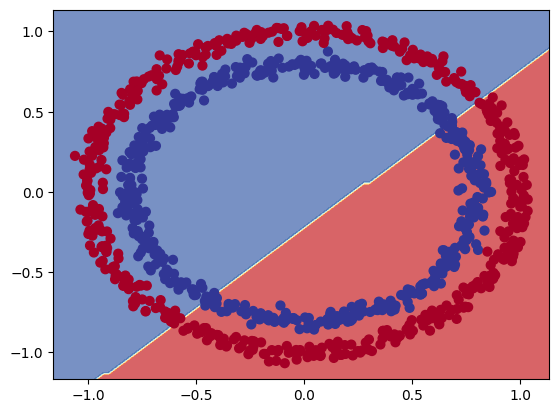

In [22]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

<div dir="rtl">

 يبدو أن نموذجنا يحاول رسم خط مستقيم عبر البيانات.

ما الخطأ في فعل هذا؟

المشكلة الرئيسية هي أن بياناتنا غير قابلة للفصل بخط مستقيم.




<div dir="rtl">

يجب أن يكون هناك شيء نفتقده في مشكلة التصنيف لدينا.

<div dir="rtl">

## القطعة المفقودة: اللاخطية

##### حسنًا، لقد رأينا أن شبكتنا العصبية يمكنها تصميم الخطوط المستقيمة (مع قدرة أفضل قليلاً من التخمين).

##### ماذا عن الخطوط غير المستقيمة (غير الخطية)؟

##### إذا كنا سنقوم بنمذجة بيانات التصنيف الخاصة بنا (الدوائر الحمراء والدوائر الدليلية)، فسنحتاج إلى بعض الخطوط غير الخطية.

##### > 🔨 **التدريب:** قبل أن نصل إلى الخطوات التالية، أود أن أشجعك على تجربة [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true) (راجع العناصر المشتركة بين البيانات وبيانات التصنيف الخاصة بنا) لمدة 10 دقائق. على وجه الخصوص علامة التبويب التي تقول "التنشيط". بمجرد الانتهاء من ذلك، أعود.

##### هل قمت بتجربة خيارات التفعيل؟ إذا كان الأمر كذلك، ماذا وجدت؟

##### إذا لم تفعل ذلك، فلا تقلق، دعنا نرى ذلك في الكود.

##### سنقوم بنسخ الشبكة العصبية التي يمكنك رؤيتها على هذا الرابط: [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true).

<img src="images/tensorboard.png" alt="loss22" />

##### *الشبكة العصبية التي سنقوم بإعادة إنشائها باستخدام كود TensorFlow. شاهده مباشرة على [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true).*

##### التغيير الرئيسي الذي سنضيفه إلى النماذج التي أنشأناها من قبل هو استخدام الكلمة الأساسية "التنشيط".


In [23]:
model_4=[]
# Set the random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4714 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4459 - accuracy: 0.4920
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4311 - accuracy: 0.4920
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4278 - accuracy: 0.4930
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4260 - accuracy: 0.4930
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4237 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4124 - accuracy: 0.4940
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3365 - accuracy: 0.4910
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2947 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2717 - accuracy: 0.4890
Epoch 11/

<div dir="rtl">
    
 حسنًا، أداء نموذجنا أسوأ قليلًا من التخمين.

دعونا نذكر أنفسنا كيف تبدو بياناتنا.

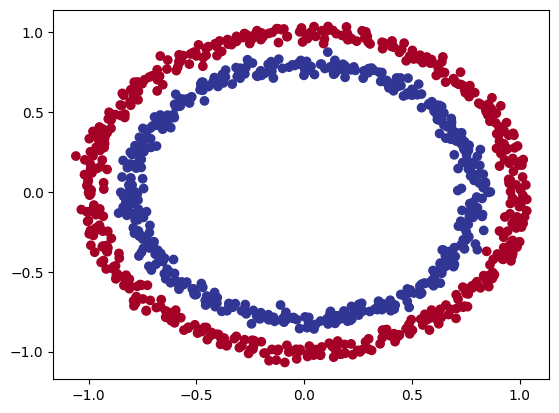

In [24]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

ودعونا نرى كيف يقوم نموذجنا بالتنبؤ به.

313/313 [==============================] - 0s 563us/step
doing binary classifcation...


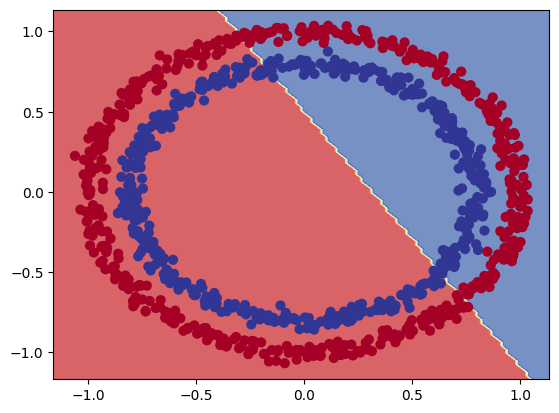

In [25]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

<div dir="rtl">

 حسنًا، يبدو أننا حصلنا على تنبؤ بخط مستقيم (خطي) مرة أخرى.

لكن بياناتنا غير خطية (ليست خطًا مستقيمًا)...

ما يتعين علينا القيام به هو إضافة بعض اللاخطية إلى نموذجنا.

للقيام بذلك، سنستخدم معلمة "التنشيط" في إحدى طبقاتنا.

In [26]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9586 - accuracy: 0.4920
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5696 - accuracy: 0.4910
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4916 - accuracy: 0.4910
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4377 - accuracy: 0.4910
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3966 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3622 - accuracy: 0.4910
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3341 - accuracy: 0.4920
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2293 - accuracy: 0.4920
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1903 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.1510 - accuracy: 0.4910
Epoch 11/

<div dir="rtl">

##### امممم...مازلت لا أتعلم...

##### ماذا نفعل لو زاد عدد الخلايا العصبية والطبقات؟

##### لنفترض أن هناك طبقتين مخفيتين، مع [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)، تُنطق "rel-u"، (اختصار لـ [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu))، التنشيط في الطبقة الأولى، و4 خلايا عصبية لكل منهما؟

##### لرؤية هذه الشبكة أثناء العمل، قم بمراجعة [TensorFlow Playground demo](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true&dataset_hide=true).

<img src="images/tensorboard.png" alt="a 6 step scikit-learnss workflow" />

##### *الشبكة العصبية التي سنقوم بإعادة إنشائها باستخدام كود TensorFlow. شاهده مباشرة على [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true&dataset_hide=true).*

##### دعونا نحاول.

<div dir="rtl">

##### ولكن هذه المرة سنقوم بتغيير وظيفة التنشيط في طبقة الإخراج لدينا أيضًا. هل تتذكر بنية نموذج التصنيف؟ بالنسبة للتصنيف الثنائي، عادةً ما يكون تنشيط طبقة الإخراج هو [Sigmoid activation function](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid).

In [27]:
model_7=[]

In [28]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=150, verbose=0)

In [29]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1682 - accuracy: 0.9890


[0.1682308465242386, 0.9890000224113464]

واو! يبدو أن نموذجنا يحقق بعض النتائج المذهلة، فلنتحقق منها.

313/313 [==============================] - 0s 616us/step
doing binary classifcation...


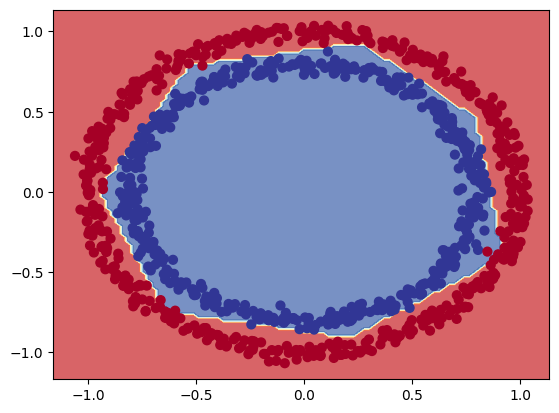

In [30]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

<div dir="rtl">

#####  جيد! يبدو أن نموذجنا يفصل بين الدائرتين بشكل مثالي تقريبًا (باستثناء بعض الأمثلة.

##### > 🤔 **السؤال:** ما الخطأ في التوقعات التي قمنا بها؟ هل نقوم حقًا بتقييم نموذجنا بشكل صحيح هنا؟ تلميح: ما هي البيانات التي تعلمها النموذج وما الذي توقعناه؟

##### قبل أن نجيب على ذلك، من المهم أن ندرك ما قمنا بتغطيته للتو.

##### > 🔑 **ملاحظة:** يعد الجمع بين **الوظائف الخطية (الخطوط المستقيمة) وغير الخطية (الخطوط غير المستقيمة)** أحد الأساسيات الأساسية للشبكات العصبية.

##### أعتقد أنه من مثل هذا:

##### إذا أعطيتك عددًا غير محدود من الخطوط المستقيمة والخطوط غير المستقيمة، فما نوع الأنماط التي يمكنك رسمها؟

##### هذا هو ما تفعله الشبكات العصبية بشكل أساسي للعثور على الأنماط في البيانات.

##### ربما تفكر الآن، "لكنني لم أر دالة خطية أو غير خطية من قبل..."

##### أوه ولكن لديك.

##### لقد تم استخدامها طوال الوقت.

##### إنها ما يقوي الطبقات في النماذج التي بنيناها للتو.

##### للحصول على بعض المعلومات حول وظائف التنشيط التي استخدمناها للتو، فلنقم بإنشائها ثم تجربتها على بعض بيانات اللعبة.

In [31]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

كيف يبدو هذا؟



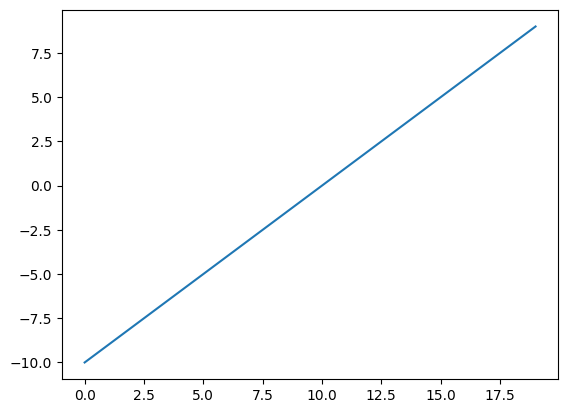

In [32]:
# Visualize our toy tensor
plt.plot(A);

<div dir="rtl">

 خط مستقيم (خطي)!

حسنًا، دعونا الآن نعيد إنشاء [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) ونرى ما يفعله ببياناتنا. يمكنك أيضًا العثور على دالة سينية معدة مسبقًا على [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function).

In [33]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

وكيف تبدو؟

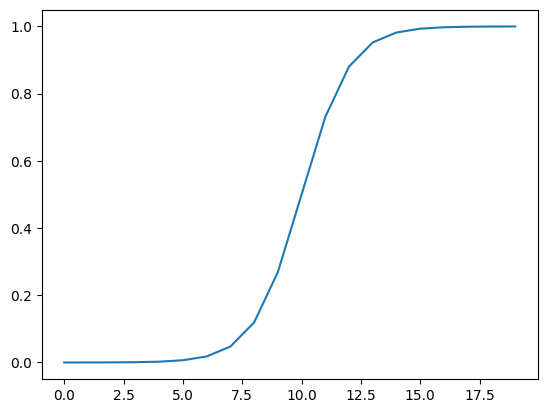

In [34]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

خط غير مستقيم (غير خطي)!

حسنًا، ماذا عن [ReLU function](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/#:~:text=The%20rectified%20linear%20activation%20function,otherwise%2C%20it%20will%20output%20zero.) (يحول ReLU جميع السلبيات إلى 0 وتظل الأرقام الموجبة كما هي)؟

In [35]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

<div dir="rtl">

 كيف يبدو الموتر المعدل بواسطة ReLU؟

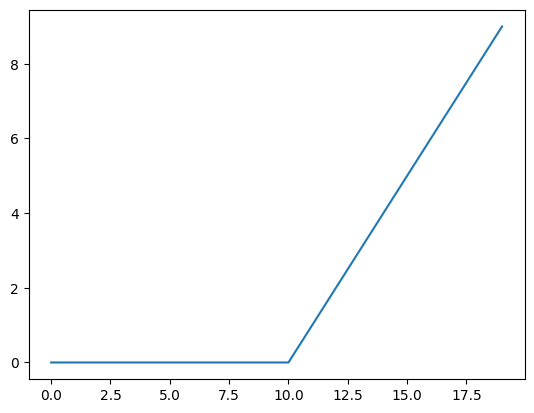

In [36]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

<div dir="rtl">

 خط آخر غير مستقيم!

حسنًا، ماذا عن [linear activation function](https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear) الخاص بـ TensorFlow؟

In [37]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

<div dir="rtl">

 حسنًا، يبدو أن مدخلاتنا لم يتم تعديلها... 

In [38]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [39]:
# Does the linear activation change anything?
tf.keras.activations.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

<div dir="rtl">

##### حسنًا، من المنطقي الآن أن النموذج لا يتعلم أي شيء عند استخدام وظائف التنشيط الخطية فقط، لأن وظيفة التنشيط الخطي لا تغير بيانات الإدخال لدينا بأي حال من الأحوال.

##### حيث أنه من خلال وظائفنا غير الخطية، يتم التلاعب ببياناتنا. تستخدم الشبكة العصبية هذا النوع من التحولات على نطاق واسع لتحديد أنماط الرسم بين مدخلاتها ومخرجاتها.

##### الآن بدلاً من الغوص في أعماق الشبكات العصبية، سنستمر في البرمجة بتطبيق ما تعلمناه على مشكلات مختلفة، ولكن إذا كنت تريد نظرة أكثر تعمقًا على ما يحدث خلف الكواليس، فاطلع على المنهج الإضافي القسم أدناه.

##### > 📖 **المصدر:** لمزيد من المعلومات حول وظائف التنشيط، قم بمراجعة [machine learning cheatsheet page](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#) عليها.

<div dir="rtl">

## تقييم وتحسين نموذج التصنيف الخاص بنا

##### إذا أجبت على السؤال أعلاه، فربما تكون قد لاحظت الخطأ الذي كنا نفعله.

##### لقد قمنا بتقييم نموذجنا على نفس البيانات التي تم تدريبه عليها.

##### سيكون النهج الأفضل هو تقسيم بياناتنا إلى مجموعات التدريب والتحقق (اختياري) والاختبار.

##### بمجرد الانتهاء من ذلك، سنقوم بتدريب نموذجنا على مجموعة التدريب (نسمح له بالعثور على أنماط في البيانات) ثم نرى مدى تعلمه للأنماط باستخدامه للتنبؤ بالقيم في مجموعة الاختبار.

##### دعنا نقوم به.

In [40]:
# How many examples are in the whole dataset?
len(X)

1000

In [41]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

<div dir="rtl">

 رائع، الآن لدينا مجموعات التدريب والاختبار، فلنضع نموذجًا لبيانات التدريب ونقيم ما تعلمه نموذجنا في مجموعة الاختبار.

In [42]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 0s 1ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.5175
Epoch 5/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5600
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.5475
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.6087
Epoch 8/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.6375
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.6600
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.6800
Epoch 11/50
25/25 [

In [43]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.9900
Model loss on the test set: 0.020587341859936714
Model accuracy on the test set: 99.00%


<div dir="rtl">

##### دقة 99%؟ لطيف - جيد!

##### الآن، عندما بدأنا في إنشاء "model_8"، قلنا أنه سيكون هو نفسه "model_7"، ولكن ربما وجدت أن هذا كذبة صغيرة.

##### وذلك لأننا قمنا بتغيير بعض الأشياء:
* **معلمة `التنشيط`** - استخدمنا سلاسل (`"relu"` و`"sigmoid"`) بدلاً من استخدام مسارات المكتبة (`tf.keras.activations.relu`)، في TensorFlow، كلاهما يقدمان نفس الوظيفة.
* **معلمة "معدل_التعلم" (أيضًا `lr`)** - قمنا بزيادة معلمة **معدل التعلم** في [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) إلى `0.01` بدلاً من `0.001` (زيادة قدرها 10x).
* يمكنك التفكير في معدل التعلم على أنه مدى سرعة تعلم النموذج. كلما ارتفع معدل التعلم، زادت قدرة النموذج على التعلم، ومع ذلك، يوجد ما يسمى بمعدل التعلم *المرتفع جدًا*، حيث يحاول النموذج التعلم بسرعة كبيرة ولا يتعلم أي شيء. سنرى خدعة للعثور على معدل التعلم المثالي قريبًا.
* **عدد العصور** - لقد خفضنا عدد العصور (باستخدام معلمة "العصور") من 100 إلى 25 ولكن نموذجنا لا يزال يحصل على نتيجة مذهلة في كل من مجموعتي التدريب والاختبار.
* أحد أسباب الأداء الجيد لنموذجنا في فترات أقل (تذكر أن فترة واحدة هي أن النموذج يحاول تعلم الأنماط في البيانات من خلال النظر إليها مرة واحدة، لذا فإن 25 فترة تعني أن النموذج يحصل على 25 فرصة) مقارنة بالسابق هو أننا قمنا بزيادة معدل التعلم.

##### نحن نعلم أن نموذجنا يؤدي أداءً جيدًا بناءً على مقاييس التقييم ولكن دعونا نرى كيفية أدائه بصريًا.

313/313 [==============================] - 0s 609us/step
doing binary classifcation...
313/313 [==============================] - 0s 612us/step
doing binary classifcation...


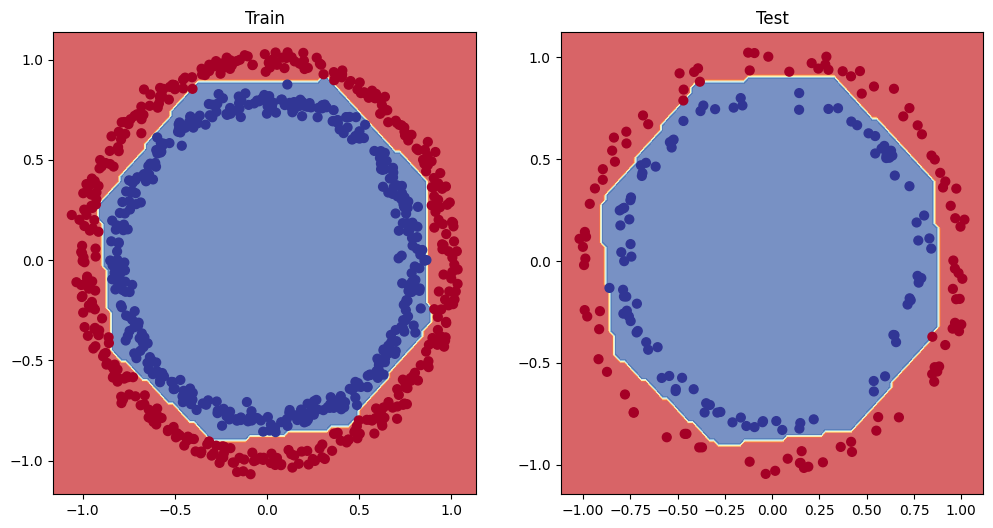

In [44]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

<div dir="rtl">

##### التحقق من ذلك! اليس رائعآ. مع بعض التعديلات، يتنبأ نموذجنا الآن بالدوائر الزرقاء والحمراء بشكل مثالي تقريبًا.

<div dir="rtl">

### رسم منحنيات الخسارة

##### بالنظر إلى المخططات أعلاه، يمكننا أن نرى أن مخرجات نموذجنا جيدة جدًا.

##### ولكن كيف سار نموذجنا أثناء التعلم؟

##### كما هو الحال في كيف يتغير الأداء في كل مرة أتيحت للنموذج فرصة إلقاء نظرة على البيانات (مرة واحدة في كل فترة)؟

##### لمعرفة ذلك، يمكننا التحقق من **منحنيات الخسارة** (يشار إليها أيضًا باسم **منحنيات التعلم**).

##### ربما لاحظت أننا نستخدم المتغير "history" عند استدعاء الدالة "fit()" في النموذج ([`fit()` يُرجع كائن "History"](https://www.tensorflow.org/api_docs/ python/tf/keras/Model#fit)).

##### هذا هو المكان الذي سنحصل فيه على المعلومات حول كيفية أداء نموذجنا أثناء تعلمه.

##### دعونا نرى كيف يمكننا استخدامه.

In [45]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.700091,0.50000
1,0.693896,0.50000
2,0.690304,0.50000
3,0.687453,0.51750
4,0.683529,0.56000
5,0.678440,0.54750
6,0.667054,0.60875
7,0.654444,0.63750
8,0.638829,0.66000
9,0.615515,0.68000


<div dir="rtl">

 وبفحص المخرجات، يمكننا أن نرى انخفاض قيم الخسارة وزيادة الدقة.

كيف يبدو (تصور، تصور، تصور)؟

Text(0.5, 1.0, 'Model_8 training curves')

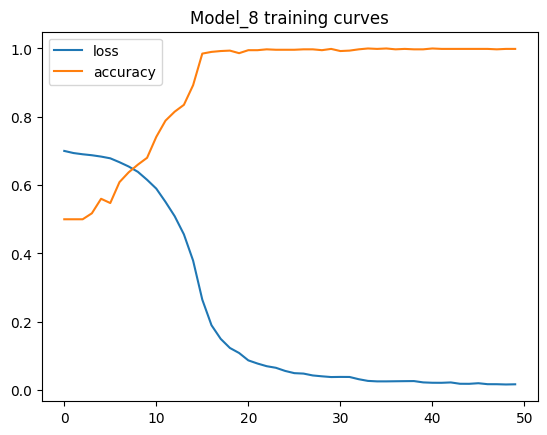

In [46]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

<div dir="rtl">

##### جميل. هذه هي الحبكة المثالية التي نبحث عنها عند التعامل مع مشكلة التصنيف، وانخفاض الخسارة، وزيادة الدقة.

##### > 🔑 **ملاحظة:** بالنسبة للعديد من المشكلات، يعني انخفاض دالة الخسارة أن النموذج يتحسن (تقترب التنبؤات التي يقوم بها من تسميات الحقيقة على الأرض).

<div dir="rtl">

### العثور على أفضل معدل للتعلم

##### بصرف النظر عن البنية نفسها (الطبقات، وعدد الخلايا العصبية، وعمليات التنشيط، وما إلى ذلك)، فإن أهم معلمة فائقة يمكنك ضبطها لنماذج شبكتك العصبية هي **معدل التعلم**.

##### في `model_8`، رأيت أننا خفضنا معدل التعلم لمُحسِّن Adam من الإعداد الافتراضي `0.001` (الافتراضي) إلى `0.01`.

##### وربما تتساءل لماذا فعلنا هذا.

##### ضع الأمر بهذه الطريقة، لقد كان تخمينًا محظوظًا.

##### لقد قررت للتو تجربة معدل تعلم أقل ومعرفة كيف سار النموذج.

##### ربما تفكر الآن، "بجدية؟ هل يمكنك فعل ذلك؟"

##### والجواب هو نعم. يمكنك تغيير أي من المعلمات الفائقة لشبكاتك العصبية.

##### مع التدريب، ستبدأ في معرفة أي نوع من المعلمات الفائقة يعمل وما لا يعمل.

##### هذا أمر مهم يجب فهمه حول التعلم الآلي والتعلم العميق بشكل عام. إنها تجريبية للغاية. أنت تبني نموذجًا وتقيمه، وتبني نموذجًا وتقيمه.

##### ومع ذلك، أريد أن أقدم لك خدعة ستساعدك في العثور على معدل التعلم الأمثل (على الأقل لبدء التدريب) لنماذجك من الآن فصاعدا.

##### للقيام بذلك، سنستخدم ما يلي:
* [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
* يمكنك اعتبار رد الاتصال بمثابة وظيفة إضافية يمكنك إضافتها إلى النموذج الخاص بك *أثناء* التدريب.
* نموذج آخر (يمكننا استخدام نفس النماذج المذكورة أعلاه، ونحن نتدرب هنا على بناء النماذج).
* مؤامرة منحنيات الخسارة المعدلة.

##### سنراجع كل منها بالرمز، ثم نشرح ما يحدث.

##### > 🔑 **ملاحظة:** يتم إعداد المعلمات الفائقة الافتراضية للعديد من العناصر الأساسية للشبكات العصبية في TensorFlow بطريقة تعمل عادةً بشكل مباشر (على سبيل المثال، يمكن للإعدادات الافتراضية [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) عادةً الحصول على نتائج جيدة في العديد من مجموعات البيانات). لذلك، من الجيد تجربة الإعدادات الافتراضية أولاً، ثم تعديلها حسب الحاجة.

In [47]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7144 - accuracy: 0.5088 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7137 - accuracy: 0.5125 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7130 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7122 - accuracy: 0.5100 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7114 - accuracy: 0.5100 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7106 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7096 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7087 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

<div dir="rtl">

 الآن انتهى نموذجنا من التدريب، دعونا نلقي نظرة على تاريخ التدريب.

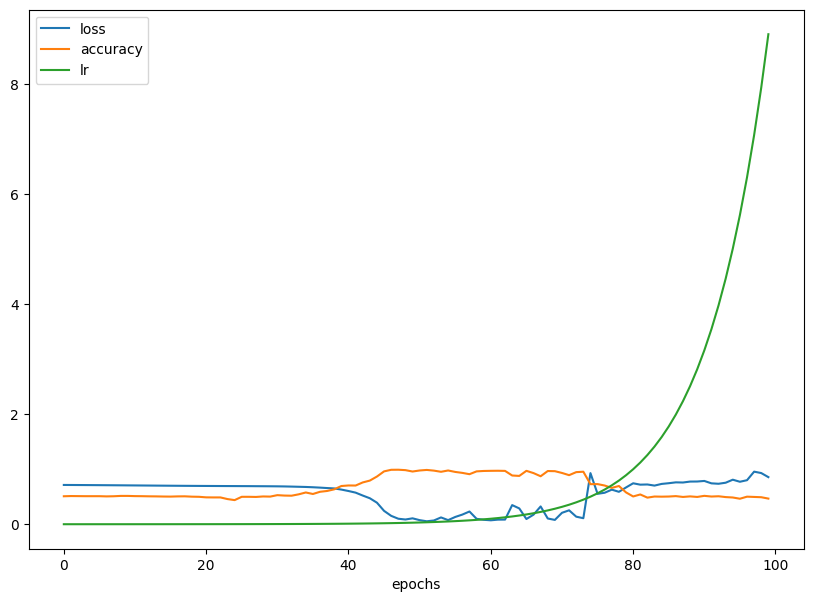

In [48]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

<div dir="rtl">

 كما ترون فإن معدل التعلم يزداد بشكل كبير مع زيادة عدد العصور.

ويمكنك أن ترى أن دقة النموذج ترتفع (وتنخفض الخسارة) عند نقطة محددة عندما يزيد معدل التعلم ببطء.

لمعرفة مكان نقطة الانعطاف هذه، يمكننا رسم الخسارة مقابل معدل التعلم على مقياس السجل.

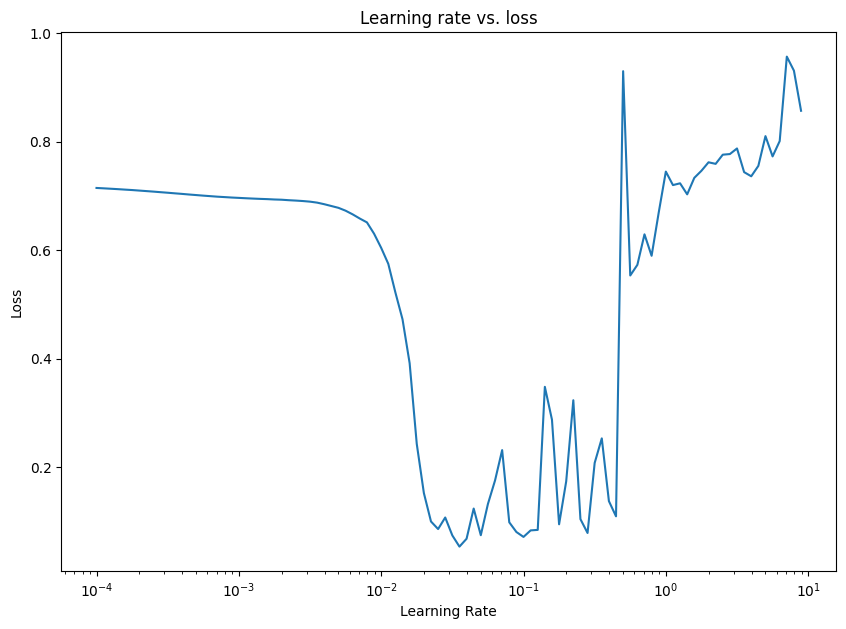

In [49]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

<div dir="rtl">

##### لمعرفة القيمة المثالية لمعدل التعلم (على الأقل القيمة المثالية *للبدء* في تدريب نموذجنا)، فإن القاعدة الأساسية هي أخذ قيمة معدل التعلم حيث لا تزال الخسارة في انخفاض ولكن لم يتم تسويتها تمامًا (عادةً ما تكون حوالي أصغر بمقدار 10 مرات من الجزء السفلي من المنحنى).

##### في هذه الحالة، ينتهي معدل التعلم المثالي لدينا بين `0.01` ($10^{-2}$) و`0.1`.

<img src="images/loss.png" alt="loss" />

##### *يقع معدل التعلم المثالي في بداية التدريب النموذجي في مكان ما قبل أن يصل منحنى الخسارة إلى القاع (قيمة لا تزال فيها الخسارة في انخفاض).*

In [50]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

<div dir="rtl">

 لقد قمنا الآن بتقدير معدل التعلم المثالي (سنستخدم `0.05`) لنموذجنا، فلنعده.

In [51]:
# Set the random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.05), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5275
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.5650
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6593 - accuracy: 0.6150
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6147 - accuracy: 0.6587
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5670 - accuracy: 0.6988
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.7225
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5099 - accuracy: 0.7375
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.7812
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.8062
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8313
Epoch 11/25
25/25 [

<div dir="rtl">

#####  - جيد! وبمعدل تعلم أعلى قليلاً (`0.05` بدلاً من `0.01`) نصل إلى نفس الدقة من `model_8` في فترات أقل (`25` بدلاً من `50`).

##### > 🛠 **التدريب العملي:** الآن رأيت مثالاً لما يمكن أن يحدث عندما تقوم بتغيير معدل التعلم، حاول تغيير قيمة معدل التعلم في [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.03154&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&problem_hide=true) وانظر ماذا سيحدث. ماذا يحدث إذا قمت بزيادة ذلك؟ ماذا يحدث إذا قمت بتقليله؟


In [52]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9950


[0.020521130412817, 0.9950000047683716]



دعونا نرى كيف تبدو التوقعات.

313/313 [==============================] - 0s 613us/step
doing binary classifcation...
313/313 [==============================] - 0s 610us/step
doing binary classifcation...


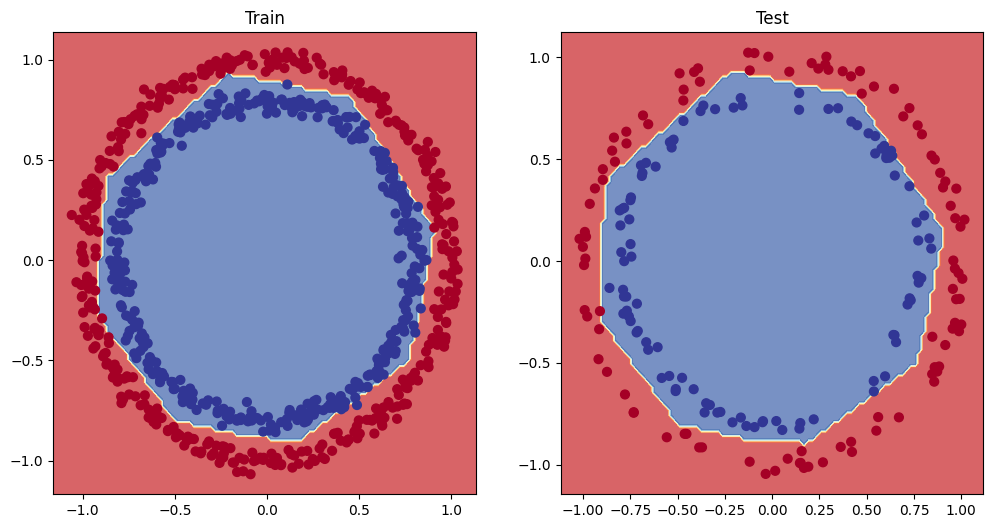

In [53]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

<div dir="rtl">

##### وكما نرى، شبه مثالي مرة أخرى.

##### هذه هي أنواع التجارب التي ستجريها كثيرًا عند إنشاء نماذجك الخاصة.

##### ابدأ بالإعدادات الافتراضية وشاهد كيفية أدائها على بياناتك.

##### وإذا لم يكن أداؤهم جيدًا كما تريد، قم بتحسينهم.

##### دعونا نلقي نظرة على بعض الطرق الإضافية لتقييم نماذج التصنيف لدينا.

<div dir="rtl">

### المزيد من طرق تقييم التصنيف

##### إلى جانب التصورات التي قمنا بها، هناك عدد من مقاييس التقييم المختلفة التي يمكننا استخدامها لتقييم نماذج التصنيف الخاصة بنا.

| **اسم المقياس/طريقة التقييم** | **تعريف** | **الكود** |
| --- | --- | --- |
| دقة | من بين 100 تنبؤ، ما هو عدد التنبؤات التي نجح نموذجك في تحقيقها؟ على سبيل المثال دقة 95% تعني أنها تحصل على تنبؤات صحيحة بنسبة 95/100. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) أو [`sklearn.metrics.accuracy_score()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| الدقة | نسبة الإيجابيات الحقيقية إلى العدد الإجمالي للعينات. تؤدي الدقة الأعلى إلى نتائج إيجابية كاذبة أقل (يتنبأ النموذج بـ 1 بينما كان ينبغي أن يكون 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) أو [`sklearn.metrics.precision_score()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| أذكر | نسبة الإيجابيات الحقيقية إلى العدد الإجمالي للإيجابيات الحقيقية والسلبيات الكاذبة (يتوقع النموذج 0 عندما يكون من المفترض أن يكون 1). يؤدي الاستدعاء العالي إلى نتائج سلبية كاذبة أقل. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) أو [`sklearn.metrics.recall_score()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| درجة F1 | يجمع بين الدقة والتذكير في مقياس واحد. 1 هو الأفضل، 0 هو الأسوأ. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) | مقارنة القيم المتوقعة مع القيم الحقيقية بطريقة جدولية، إذا كانت صحيحة بنسبة 100%، فإن جميع القيم في المصفوفة ستكون من أعلى اليسار إلى أسفل اليمين (خط التشخيص). | وظيفة مخصصة أو [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| تقرير التصنيف | مجموعة من بعض مقاييس التصنيف الرئيسية مثل الدقة والاستدعاء ودرجة f1. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

##### > 🔑 **ملاحظة:** ستتطلب كل مشكلة تصنيف أنواعًا مختلفة من أساليب التقييم. ولكن يجب أن تكون على دراية بتلك المذكورة أعلاه على الأقل.

##### لنبدأ بالدقة.

##### لأننا مررنا `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` عليه سيعيد الخسارة وكذلك الدقة.

In [54]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9950
Model loss on test set: 0.020521130412817
Model accuracy on test set: 99.50%


<div dir="rtl">

 ماذا عن مصفوفة الارتباك؟

<img src="images/confusion.png" alt="loss" />

*تشريح مصفوفة الارتباك (ما سنقوم بإنشائه). تظهر التوقعات الصحيحة أسفل القطر (من أعلى اليسار إلى أسفل اليمين).*

يمكننا إنشاء مصفوفة ارتباك باستخدام طريقة [Scikit-Learn's `confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [56]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 743us/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

<div dir="rtl">

 اه، يبدو أن توقعاتنا ليست بالشكل الذي يجب أن تكون عليه.

دعونا التحقق منها.

In [57]:
# View the first 10 predictions
y_preds[:10]

array([[9.4441599e-01],
       [9.9130189e-01],
       [9.9130189e-01],
       [9.9130189e-01],
       [1.1058455e-01],
       [8.5738204e-05],
       [9.8707515e-01],
       [5.1555366e-05],
       [9.9130189e-01],
       [3.0845779e-06]], dtype=float32)

<div dir="rtl">

ماذا عن تسميات الاختبار لدينا؟

In [58]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

<div dir="rtl">

##### يبدو أننا بحاجة إلى إدخال توقعاتنا في التنسيق الثنائي (0 أو 1).

##### ولكن ربما تتساءل، ما هو التنسيق الموجود حاليًا؟

##### في تنسيقها الحالي (`9.8526537e-01`)، تكون في شكل يسمى **احتمالات التنبؤ**.

##### ستشاهد هذا كثيرًا مع مخرجات الشبكات العصبية. في كثير من الأحيان لن تكون قيمًا دقيقة ولكن هناك احتمال أكبر لمدى *احتمالية* أن تكون قيمة أو أخرى.

##### لذا فإن إحدى الخطوات التي ستراها غالبًا بعد إجراء التنبؤات باستخدام الشبكة العصبية هي تحويل الاحتمالات المتوقعة إلى تسميات.

##### في حالتنا، نظرًا لأن تسميات الحقيقة الأساسية (`y_test`) لدينا هي ثنائية (0 أو 1)، فيمكننا تحويل احتمالات التنبؤ المستخدمة إلى شكلها الثنائي باستخدام [`tf.round()`](https://www.tensorflow.org/api_docs/ بيثون/تف/الرياضيات/جولة).

In [59]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

<div dir="rtl">

 رائع! الآن يمكننا استخدام الدالة `confusion_matrix`.

In [60]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

<div dir="rtl">
    
 حسنًا، يمكننا أن نرى أعلى الأرقام موجودة أسفل القطر (من أعلى اليسار إلى أسفل اليمين) لذا فهذه علامة جيدة، لكن بقية المصفوفة لا تخبرنا كثيرًا حقًا.

ماذا عن إنشاء دالة لجعل مصفوفة الارتباك لدينا أكثر وضوحًا؟

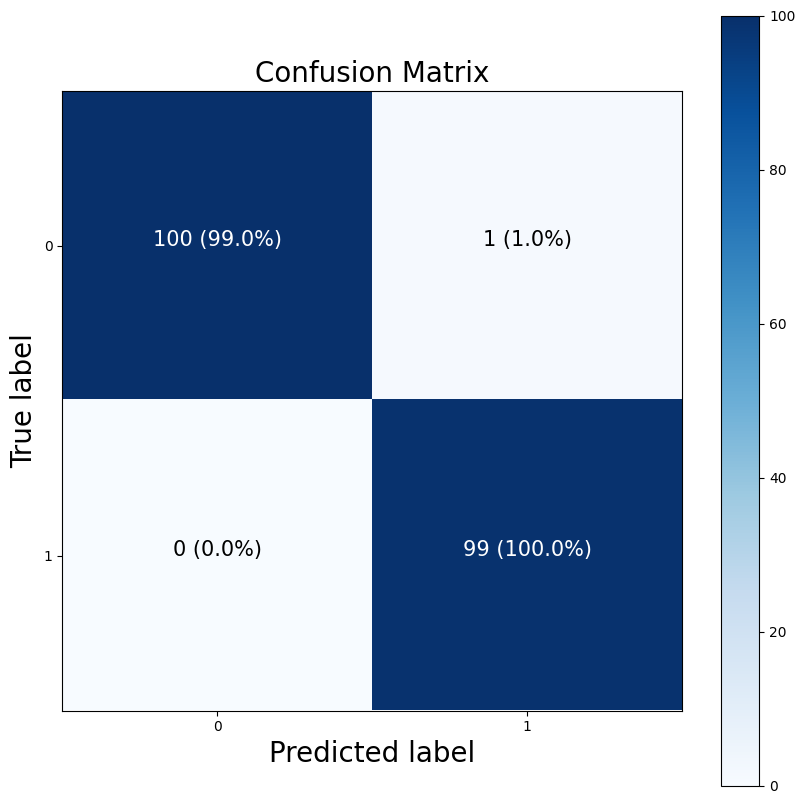

In [61]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

<div dir="rtl">

##### هذا يبدو أفضل بكثير. يبدو أن نموذجنا قدم تنبؤات مثالية تقريبًا في مجموعة الاختبار باستثناء ثلاث نتائج إيجابية كاذبة (الزاوية اليمنى العليا).

<div dir="rtl">

## العمل مع مثال أكبر (تصنيف متعدد الفئات)

##### لقد رأينا مثالاً للتصنيف الثنائي (التنبؤ بما إذا كانت نقطة البيانات جزءًا من دائرة حمراء أو دائرة زرقاء) ولكن ماذا لو كان لديك فئات مختلفة متعددة من الأشياء؟

##### على سبيل المثال، لنفترض أنك شركة أزياء وأردت إنشاء شبكة عصبية للتنبؤ بما إذا كانت قطعة الملابس عبارة عن حذاء أو قميص أو سترة (3 خيارات مختلفة).

##### عندما يكون لديك أكثر من فئتين كخيار، يُعرف هذا باسم **التصنيف متعدد الفئات**.

##### والخبر السار هو أن الأشياء التي تعلمناها حتى الآن (مع بعض التعديلات) يمكن تطبيقها على مسائل التصنيف متعددة الفئات أيضًا.

##### دعونا نرى ذلك في العمل.

##### للبدء، سنحتاج إلى بعض البيانات. الشيء الجيد بالنسبة لنا هو أن TensorFlow يحتوي على مجموعة بيانات تصنيف متعددة الفئات تُعرف باسم [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist). وهذا يعني أننا يمكن أن نبدأ على الفور.

##### يمكننا استيراده باستخدام الوحدة [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets).

##### > 📖 **المصدر:** تم تعديل مشكلة التصنيف متعدد الفئات التالية من [TensorFlow classification guide](https://www.tensorflow.org/tutorials/keras/classification). سيكون التمرين الجيد هو تكرار دليل TensorFlow بمجرد الاطلاع على المثال التالي.

In [62]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

الآن دعونا نتحقق من مثال.

In [63]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

<div dir="rtl">

 واو، لقد حصلنا على قائمة كبيرة من الأرقام، متبوعة (البيانات) برقم واحد (تسمية الفصل).

ماذا عن الأشكال؟

In [64]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [65]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

<div dir="rtl">

 حسنًا، 60000 مثال تدريبي لكل منها شكل (28، 28) وملصق لكل منها، بالإضافة إلى 10000 مثال اختباري للشكل (28، 28).

ولكن هذه مجرد أرقام، دعونا نتصور.

In [66]:
class_counts_train = np.bincount(train_labels)
class_counts_train

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [67]:
class_counts_test = np.bincount(test_labels)
class_counts_test

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

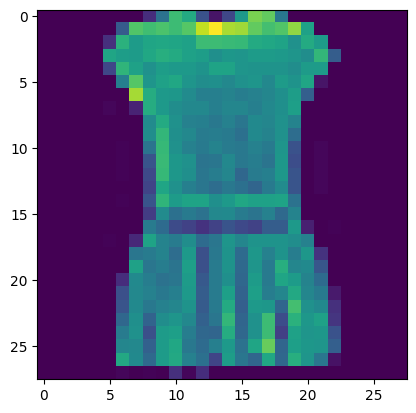

In [68]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[3]);

<div dir="rtl">

 حسنًا، ولكن ماذا عن الملصق الخاص بها؟

In [69]:
# Check our samples label
train_labels[7]

2

<div dir="rtl">

##### يبدو أن تسمياتنا في شكل رقمي. وعلى الرغم من أن هذا أمر جيد بالنسبة للشبكة العصبية، فقد ترغب في جعلها في شكل يمكن قراءته بواسطة الإنسان.

##### لنقم بإنشاء قائمة صغيرة بأسماء الفئات (يمكننا العثور عليها على [the dataset's GitHub page](https://github.com/zalandoresearch/fashion-mnist#labels)).

##### > 🔑 **ملاحظة:** على الرغم من أن مجموعة البيانات هذه قد تم إعدادها لنا وجاهزة للانطلاق، فمن المهم أن تتذكر أن العديد من مجموعات البيانات لن تكون جاهزة للانطلاق مثل هذه. سيتعين عليك في كثير من الأحيان القيام ببعض خطوات المعالجة المسبقة لتكون جاهزة للاستخدام مع الشبكة العصبية (سنرى المزيد من هذا عندما نعمل مع بياناتنا الخاصة لاحقًا).

In [70]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

<div dir="rtl">

##### الآن لدينا هذه، دعونا نرسم مثالا آخر.

##### > 🤔 **السؤال:** انتبه بشكل خاص إلى شكل البيانات التي *نتعامل معها*. هل هي خطوط مستقيمة فقط؟ أم أنها تحتوي على خطوط غير مستقيمة أيضًا؟ هل تعتقد أننا إذا أردنا العثور على أنماط في صور الملابس (وهي في الواقع مجموعات من البكسلات)، فهل سيحتاج نموذجنا إلى خطوط غير خطية (خطوط غير مستقيمة) أم لا؟

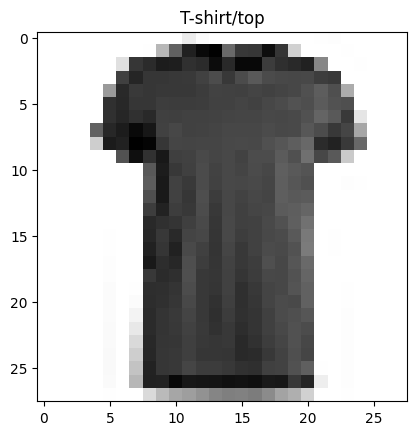

In [71]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[10]]);

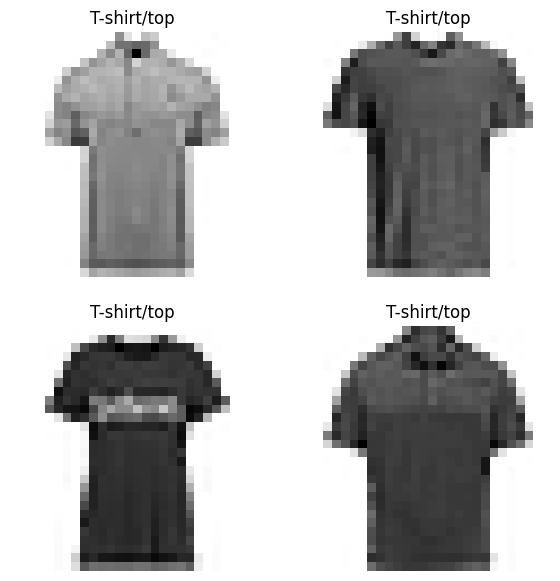

In [72]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

<div dir="rtl">

##### حسنًا، لنبني نموذجًا لمعرفة العلاقة بين قيم البكسل وتسمياتها.

##### نظرًا لأن هذه مشكلة تصنيف متعددة الفئات، فسنحتاج إلى إجراء بعض التغييرات على بنيتنا (بما يتماشى مع الجدول 1 أعلاه):

* يجب أن يتعامل **شكل الإدخال** مع موترات 28x28 (ارتفاع وعرض صورنا).
* سنقوم في الواقع بسحق المدخلات في موتر (متجه) للشكل `(784)`.
* يجب أن يكون **شكل الإخراج** 10 لأننا نحتاج إلى نموذجنا للتنبؤ بـ 10 فئات مختلفة.
* سنقوم أيضًا بتغيير معلمة "التنشيط" لطبقة الإخراج الخاصة بنا لتصبح [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) بدلاً من "sigmoid". كما سنرى، تقوم وظيفة التنشيط `"softmax"` بإخراج سلسلة من القيم بين 0 و1 (نفس شكل **شكل الإخراج**، والتي تضيف معًا ما يصل إلى ~1. ويتم توقع الفهرس ذو القيمة الأعلى حسب النموذج ليكون الفئة الأكثر *احتمالا*.
* سنحتاج إلى تغيير دالة الخسارة لدينا من دالة الخسارة الثنائية إلى دالة الخسارة متعددة الفئات.
* وبشكل أكثر تحديدًا، نظرًا لأن تصنيفاتنا في شكل عدد صحيح، فسنستخدم [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)، إذا كانت تصنيفاتنا مشفرة بشكل سريع (على سبيل المثال، كانت تبدو مثل `[`tf.keras.losses.SparseCategoricalCrossentropy()، سنستخدم [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* سنستخدم أيضًا المعلمة `validation_data` عند استدعاء الدالة `fit()`. سيعطينا هذا فكرة عن كيفية أداء النموذج في مجموعة الاختبار أثناء التدريب.

##### هل انت مستعد؟ دعنا نذهب.

In [73]:
model_11=[]

In [74]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2093 - accuracy: 0.1791 - val_loss: 1.8288 - val_accuracy: 0.3272
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7110 - accuracy: 0.3185 - val_loss: 1.5607 - val_accuracy: 0.3658
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5236 - accuracy: 0.3729 - val_loss: 1.4750 - val_accuracy: 0.3669
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4632 - accuracy: 0.3771 - val_loss: 1.4096 - val_accuracy: 0.4034
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4282 - accuracy: 0.4136 - val_loss: 1.3138 - val_accuracy: 0.4396
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3505 - accuracy: 0.4256 - val_loss: 1.4055 - val_accuracy: 0.4359
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2539 - accuracy: 0.4462 - val_loss: 1.2440 - val_accuracy:

In [75]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 4)                 3140      
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


<div dir="rtl">

 حسنًا، يصل نموذجنا إلى حوالي 45% من الدقة بعد 10 فترات باستخدام نموذج نمط مشابه لما استخدمناه في مشكلة التصنيف الثنائي لدينا.

أيهما أفضل من التخمين (التخمين باستخدام 10 فصول سيؤدي إلى دقة تبلغ حوالي 10٪) ولكن يمكننا أن نفعل ما هو أفضل.

هل تتذكر عندما تحدثنا عن الشبكات العصبية التي تفضل الأرقام بين 0 و 1؟ (إذا لم يكن الأمر كذلك، تعامل مع هذا كتذكير)

حسنًا، في الوقت الحالي، البيانات المتوفرة لدينا ليست بين 0 و1، وبعبارة أخرى، لم يتم تطبيعها (ولهذا السبب استخدمنا المتغير `non_norm_history` عند استدعاء `fit()`). تتراوح قيم البكسل الخاصة بها بين 0 و255.

دعنا نرى.

In [76]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

<div dir="rtl">

 يمكننا الحصول على هذه القيم بين 0 و1 عن طريق قسمة المصفوفة بأكملها على الحد الأقصى: `255.0` (القسمة على عدد عشري تتحول أيضًا إلى عدد عشري).


سيؤدي القيام بذلك إلى أن تكون جميع بياناتنا بين 0 و1 (المعروفة باسم **القياس** أو **التطبيع**).

In [77]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

<div dir="rtl">

 جميل! الآن بياناتنا تقع بين 0 و1. دعونا نرى ما سيحدث عندما نمثلها.

سنستخدم نفس النموذج كما كان من قبل (`model_11`) باستثناء أنه سيتم تسوية البيانات هذه المرة.

In [78]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2915 - accuracy: 0.5020 - val_loss: 0.9645 - val_accuracy: 0.6115
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8836 - accuracy: 0.6434 - val_loss: 0.8503 - val_accuracy: 0.6686
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8063 - accuracy: 0.6731 - val_loss: 0.8010 - val_accuracy: 0.6953
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7124 - accuracy: 0.7316 - val_loss: 0.7042 - val_accuracy: 0.7495
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6488 - accuracy: 0.7629 - val_loss: 0.6560 - val_accuracy: 0.7698
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6089 - accuracy: 0.7898 - val_loss: 0.6361 - val_accuracy: 0.7822
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5826 - accuracy: 0.8029 - val_loss: 0.6219 - val_accuracy:

<div dir="rtl">

 واو، لقد استخدمنا نفس النموذج تمامًا كما كان من قبل ولكننا مع البيانات المقيسة نشهد الآن قيمة دقة أعلى بكثير!

دعونا نرسم تاريخ كل نموذج (منحنيات الخسارة الخاصة بهم).

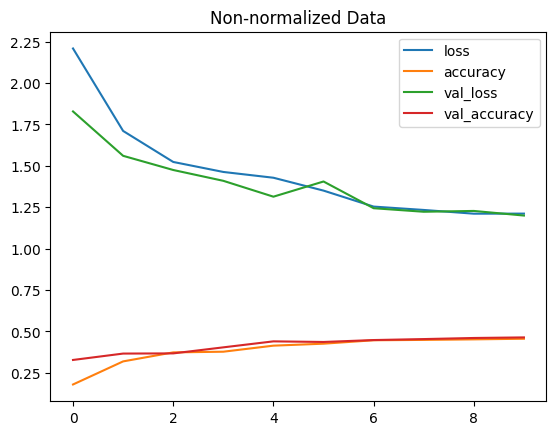

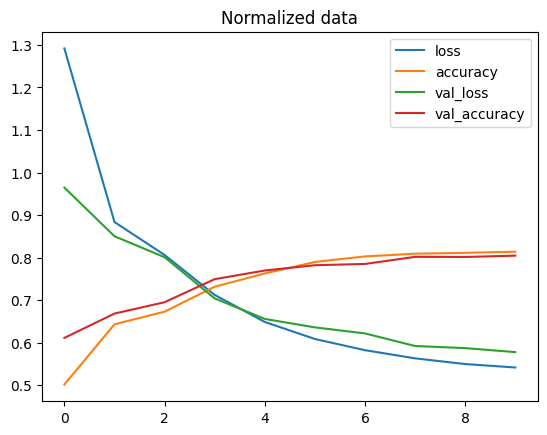

In [79]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

<div dir="rtl">

##### رائع. من هاتين المخططين، يمكننا أن نرى مدى سرعة تحسن نموذجنا الذي يحتوي على البيانات المقيسة (`model_12`) من النموذج الذي يحتوي على البيانات غير المقيسة (`model_11`).

##### > 🔑 **ملاحظة:** يمكن للنموذج نفسه الذي يحتوي على بيانات مختلفة *قليلًا* أن ينتج نتائج مختلفة *بشكل كبير*. لذا، عند مقارنة النماذج، من المهم التأكد من مقارنتها وفقًا للمعايير نفسها (على سبيل المثال، نفس البنية ولكن ببيانات مختلفة أو نفس البيانات ولكن ببنية مختلفة).

##### ماذا عن إيجاد معدل التعلم المثالي ونرى ماذا سيحدث؟

##### سوف نستخدم نفس البنية التي كنا نستخدمها.

In [80]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2915 - accuracy: 0.5020 - val_loss: 0.9645 - val_accuracy: 0.6115 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8795 - accuracy: 0.6455 - val_loss: 0.8428 - val_accuracy: 0.6652 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7900 - accuracy: 0.6844 - val_loss: 0.7406 - val_accuracy: 0.7334 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6771 - accuracy: 0.7491 - val_loss: 0.6747 - val_accuracy: 0.7612 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6261 - accuracy: 0.7749 - val_loss: 0.6323 - val_accuracy: 0.7871 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5851 - accuracy: 0.8026 - val_loss: 0.6237 - val_accuracy: 0.7903 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

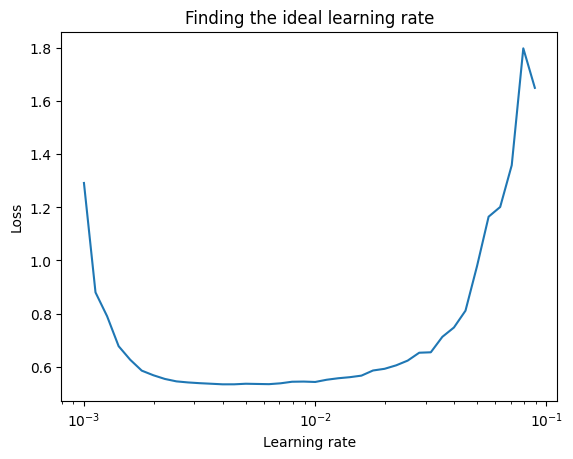

In [81]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

<div dir="rtl">

 في هذه الحالة، يبدو أن معدل التعلم الافتراضي [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) (`0.001`) هو معدل التعلم المثالي بالقرب من معدل التعلم الافتراضي.

دعونا نعيد تجهيز النموذج باستخدام معدل التعلم المثالي.

In [82]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2915 - accuracy: 0.5020 - val_loss: 0.9645 - val_accuracy: 0.6115
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8836 - accuracy: 0.6434 - val_loss: 0.8503 - val_accuracy: 0.6686
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8063 - accuracy: 0.6731 - val_loss: 0.8010 - val_accuracy: 0.6953
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7124 - accuracy: 0.7316 - val_loss: 0.7042 - val_accuracy: 0.7495
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6488 - accuracy: 0.7629 - val_loss: 0.6560 - val_accuracy: 0.7698
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6089 - accuracy: 0.7898 - val_loss: 0.6361 - val_accuracy: 0.7822
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5826 - accuracy: 0.8029 - val_loss: 0.6219 - val_accuracy:

## النموذج المتقدم

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Build the model
model_15 = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # 10 output neurons for 10 classes, with softmax activation
])

# Compile the model
model_15.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# Fit the model
history = model_15.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

# Evaluate the model on the test data
test_loss, test_accuracy = model_15.evaluate(test_data, test_labels)

test_accuracy

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6126 - accuracy: 0.7798 - val_loss: 0.4494 - val_accuracy: 0.8383
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4676 - accuracy: 0.8350 - val_loss: 0.4298 - val_accuracy: 0.8522
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4320 - accuracy: 0.8483 - val_loss: 0.4033 - val_accuracy: 0.8580
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4173 - accuracy: 0.8543 - val_loss: 0.4019 - val_accuracy: 0.8598
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3989 - accuracy: 0.8607 - val_loss: 0.3784 - val_accuracy: 0.8674
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3838 - accuracy: 0.8646 - val_loss: 0.3821 - val_accuracy: 0.8624
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3777 - accuracy: 0.8659 - val_loss: 0.3804 - val_accuracy:

0.8748999834060669

In [84]:
model_15.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_35 (Dense)            (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)             

<div dir="rtl">

##### الآن لدينا نموذج تم تدريبه بمعدل تعليم قريب من المثالي وأداء جيد جدًا، لدينا خياران.

##### نستطيع:
* قم بتقييم أدائه باستخدام مقاييس التصنيف الأخرى (مثل [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) أو [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)).
* تقييم بعض توقعاته (من خلال التصورات).
* تحسين دقتها (من خلال تدريبها لفترة أطول أو تغيير البنية).
* حفظها وتصديرها لاستخدامها في التطبيق.

##### دعنا نذهب من خلال الخيارين الأولين.

##### سنقوم أولاً بإنشاء مصفوفة تصنيف لتصور تنبؤاتها عبر الفئات المختلفة.

In [85]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

    Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """  
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes), # create enough axis slots for each class
        yticks=np.arange(n_classes), 
        xticklabels=labels, # axes will labeled with class names (if they exist) or ints
        yticklabels=labels)
  
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

<div dir="rtl">

 نظرًا لأن مصفوفة الارتباك تقارن تسميات الحقيقة (`test_labels`) بالتسميات المتوقعة، يتعين علينا إجراء بعض التنبؤات باستخدام نموذجنا.

In [86]:
# Make predictions with the most recent model
y_probs = model_15.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 769us/step


array([[7.68799691e-06, 3.47194543e-07, 1.62685225e-07, 1.57373015e-05,
        3.34432434e-06, 4.29632850e-02, 6.74160719e-06, 3.99560072e-02,
        1.09541515e-05, 9.17035699e-01],
       [1.99816562e-03, 5.20214962e-05, 9.87797439e-01, 2.13538369e-05,
        5.15311584e-03, 1.00683105e-14, 4.96277120e-03, 5.37706510e-14,
        1.52376297e-05, 6.70351632e-14],
       [2.47533104e-26, 1.00000000e+00, 7.61974870e-21, 2.32724074e-25,
        8.54149583e-14, 0.00000000e+00, 1.55100932e-26, 0.00000000e+00,
        8.02976940e-24, 0.00000000e+00],
       [9.22303695e-19, 1.00000000e+00, 2.38330202e-14, 9.01820648e-15,
        1.02030218e-09, 0.00000000e+00, 1.26215064e-18, 0.00000000e+00,
        8.77438201e-16, 0.00000000e+00],
       [1.02264248e-01, 7.11976008e-06, 4.81192656e-02, 8.22351780e-04,
        3.34532820e-02, 6.48437037e-08, 8.11451852e-01, 1.47564032e-08,
        3.88187985e-03, 3.23240124e-09]], dtype=float32)

<div dir="rtl">

 يُخرج نموذجنا قائمة **احتمالات التنبؤ**، مما يعني أنه يُخرج رقمًا يوضح مدى احتمالية أن تكون فئة معينة هي التسمية.

كلما زاد الرقم في قائمة احتمالات التنبؤ، زاد احتمال اعتقاد النموذج بأن هذه هي الفئة الصحيحة.

للعثور على أعلى قيمة يمكننا استخدام الطريقة [`argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [87]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

<div dir="rtl">

 الآن دعونا نفعل الشيء نفسه بالنسبة لجميع التوقعات.

In [88]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

<div dir="rtl">

 رائع، الآن حصلنا على تنبؤات نموذجنا في شكل تسمية، فلننشئ مصفوفة ارتباك لعرضها مقابل تسميات الحقيقة.

In [89]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[812,   0,  11,  41,   5,   1, 121,   0,   9,   0],
       [  2, 966,   3,  25,   2,   0,   1,   0,   1,   0],
       [ 24,   1, 723,  11, 163,   0,  74,   0,   4,   0],
       [ 19,   4,   6, 890,  47,   0,  29,   0,   5,   0],
       [  1,   1,  59,  24, 856,   0,  54,   0,   5,   0],
       [  0,   0,   0,   0,   0, 957,   0,  33,   4,   6],
       [126,   0,  79,  39,  78,   0, 667,   0,  11,   0],
       [  0,   0,   0,   0,   0,  15,   0, 975,   0,  10],
       [  1,   0,   2,   5,   5,   1,   6,   4, 976,   0],
       [  1,   0,   0,   0,   0,  14,   0,  58,   0, 927]])

<div dir="rtl">

 من الصعب فهم مصفوفة الارتباك هذه، فلنجعلها أجمل باستخدام الوظيفة التي أنشأناها من قبل.

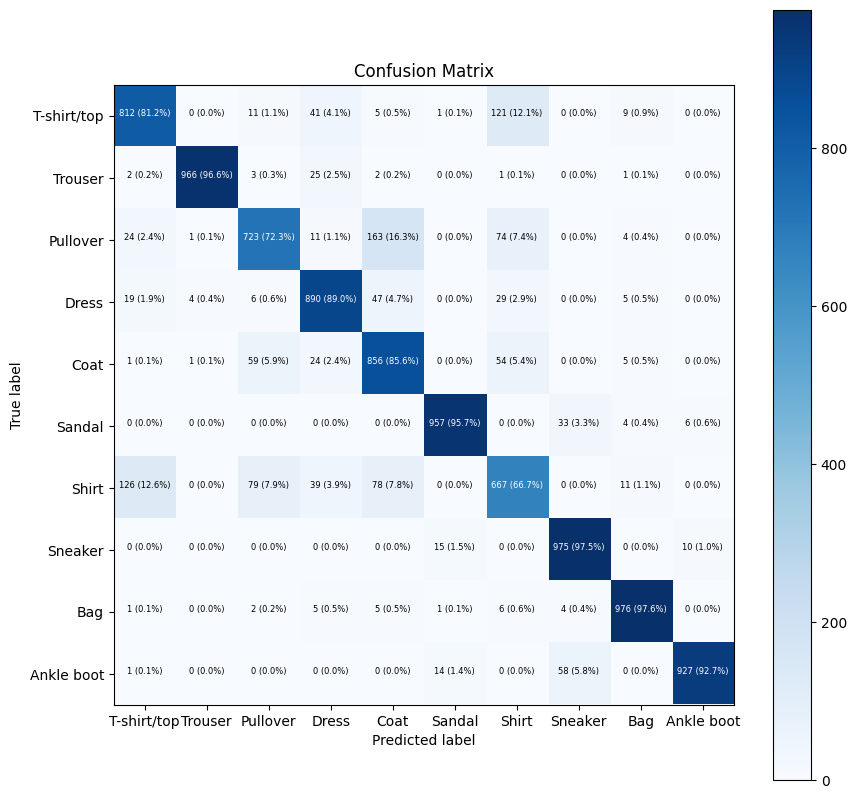

In [90]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(10, 10),
                      text_size=6)

<div dir="rtl">

##### هذا يبدو أفضل بكثير! (أحد المعالم المفضلة لدي في العالم هي مصفوفة الارتباك ذات المربعات الداكنة أسفل القطر)

##### إلا أن النتائج ليست جيدة كما يمكن أن تكون.

##### يبدو أن نموذجنا يخلط بين فئتي "القميص" و"القميص/القميص" (على سبيل المثال، التنبؤ بـ "القميص" عندما يكون في الواقع "قميص/قميص").

##### > 🤔 **السؤال:** هل من المنطقي أن تخلط عارضتنا بين فئتي "القميص" و"القميص/القميص"؟ لماذا تعتقد أن هذا قد يكون؟ ما هي إحدى الطرق التي يمكنك من خلالها التحقيق؟

##### لقد رأينا كيف تتوافق توقعات نماذجنا مع تسميات الحقيقة باستخدام مصفوفة الارتباك، ولكن ماذا عن تصور بعضها؟

##### لنقم بإنشاء دالة لرسم صورة عشوائية مع توقعها.

##### > 🔑 **ملاحظة:** في كثير من الأحيان عند العمل مع الصور والأشكال الأخرى من البيانات المرئية، من الجيد أن تقوم بالتصور قدر الإمكان لتطوير فهم أكبر للبيانات ومخرجات النموذج الخاص بك.

In [91]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
    """Picks a random image, plots it and labels it with a predicted and truth label.

    Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

    Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
    """ 
    # Setup random integer
    i = random.randint(0, len(images))
  
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 26ms/step


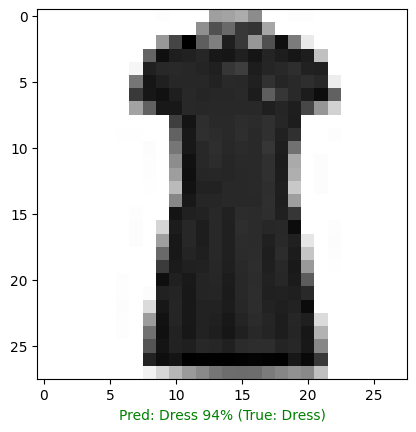

In [92]:
# Check out a random image as well as its prediction
plot_random_image(model=model_15, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

<div dir="rtl">

 بعد تشغيل الخلية أعلاه عدة مرات، ستبدأ في الحصول على فهم مرئي للعلاقة بين تنبؤات النموذج والتسميات الحقيقية.

هل اكتشفت ما هي التنبؤات التي يرتبك النموذج بشأنها؟

يبدو أنه يتم الخلط بين الفئات المتشابهة، على سبيل المثال، `Sneaker` مع `Ankle Boot`.

وبالنظر إلى الصور، يمكنك أن ترى كيف يمكن أن يكون هذا هو الحال.

الشكل العام للحذاء الرياضي وحذاء الكاحل متشابهان.

قد يكون الشكل العام أحد الأنماط التي تعلمها النموذج، وبالتالي عندما يكون لصورتين شكل مماثل، تختلط توقعاتهما.

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D

tf.random.set_seed(42)
#random.seed(42)
#np.random.seed(42)

cnn_model=[]
# Expand dimensions to fit CNN input shape (batch_size, height, width, channels)
train_data_cnn=[]
test_data_cnn=[]
train_data_cnn = train_data[..., np.newaxis]
test_data_cnn = test_data[..., np.newaxis]

#Build the CNN model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),  # 1st convolutional layer
    MaxPooling2D((2, 2)),  # 1st max pooling layer
    Conv2D(64, (3,3), activation='relu'),  # 2nd convolutional layer
    MaxPooling2D((2, 2)),  # 2nd max pooling layer
    Conv2D(128, (3,3), activation='relu'),  # 3rd convolutional layer
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # 10 output neurons for 10 classes
])

# # Improved CNN model
# cnn_model = Sequential([
#     # 1st block
#     Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)),
#     BatchNormalization(),
#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
#     Dropout(0.3),
    
#     # 2nd block
#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
#     Dropout(0.3),
    
#     # 3rd block
#     Conv2D(256, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
#     Dropout(0.3),
    
#     # Fully connected layers
#     Flatten(),
#     Dense(512, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(10, activation='softmax')
# ])

# Compile the model
cnn_model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(train_data_cnn, train_labels, epochs=10, validation_split=0.2, batch_size=32)

# Evaluate the model on the test data
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(test_data_cnn, test_labels)

cnn_test_accuracy

Epoch 1/10


2024-03-17 13:53:10.545932: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8801


1500/1500 [==============================] - 6s 2ms/step - loss: 0.5389 - accuracy: 0.8000 - val_loss: 0.3898 - val_accuracy: 0.8543
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3539 - accuracy: 0.8724 - val_loss: 0.3370 - val_accuracy: 0.8737
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3008 - accuracy: 0.8894 - val_loss: 0.2945 - val_accuracy: 0.8932
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9008 - val_loss: 0.2740 - val_accuracy: 0.8966
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2417 - accuracy: 0.9107 - val_loss: 0.2690 - val_accuracy: 0.9035
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2176 - accuracy: 0.9199 - val_loss: 0.2630 - val_accuracy: 0.9050
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1980 - accuracy: 0.9260 - val_loss: 0.2564 - val_accuracy: 0.9068
Epo

0.9071999788284302

<div dir="rtl">

##  كيف يتعلم النموذج (باختصار)

##### حسنًا، لقد قمنا بتدريب مجموعة من العارضات، لكننا لم نناقش أبدًا ما يحدث تحت الغطاء. فكيف يتعلم النموذج بالضبط؟

##### يتعلم النموذج من خلال تحديث وتحسين مصفوفات الوزن الخاصة به وقيم التحيزات في كل عصر (في حالتنا، عندما نطلق على الوظيفة `fit()`).

##### ويقوم بذلك عن طريق مقارنة الأنماط التي تعلمها بين البيانات والتسميات بالتسميات الفعلية.

##### إذا كانت الأنماط الحالية (مصفوفات الوزن وقيم التحيز) لا تؤدي إلى انخفاض مرغوب فيه في دالة الخسارة (الخسارة الأعلى تعني توقعات أسوأ)، يحاول المُحسِّن توجيه النموذج لتحديث أنماطه بالطريقة الصحيحة (باستخدام القيمة الحقيقية التسميات كمرجع).

##### تسمى عملية استخدام التسميات الحقيقية كمرجع لتحسين تنبؤات النموذج بـ [**backpropagation**](https://en.wikipedia.org/wiki/Backpropagation).

##### بمعنى آخر، تمر البيانات والتسميات عبر نموذج (**تمرير أمامي**) ويحاول التعرف على العلاقة بين البيانات والتسميات.

##### وإذا لم تكن هذه العلاقة المكتسبة قريبة من العلاقة الفعلية أو كان من الممكن تحسينها، فإن النموذج يفعل ذلك عن طريق الرجوع إلى نفسه (**تمرير خلفي**) وتعديل مصفوفات الأوزان وقيم التحيز لتمثيل البيانات بشكل أفضل.

##### إذا كان كل هذا يبدو مربكًا (ولا بأس إذا كان الأمر كذلك، فما ورد أعلاه هو وصف موجز جدًا)، راجع الموارد الموجودة في قسم المنهج الإضافي لمزيد من المعلومات.

<div dir="rtl">

# #تمارين 🛠

1. العب بالشبكات العصبية في [TensorFlow Playground](https://playground.tensorflow.org/) لمدة 10 دقائق. جرب بشكل خاص قيمًا مختلفة للتعلم، ماذا يحدث عندما تقللها؟ ماذا يحدث عند زيادتها؟
2. قم بتكرار النموذج الموضح في الصورة في [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) أدناه باستخدام كود TensorFlow. قم بتجميعها باستخدام مُحسِّن Adam وفقدان الانتروبيا الثنائية ومقياس الدقة. بمجرد تجميعه، تحقق من ملخص النموذج.
<img src="images/exo.png" alt="loaass" />

*جرب هذه الشبكة بنفسك على [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). تلميح: هناك 5 طبقات مخفية ولكن طبقة الإخراج ليست مصورة، سيتعين عليك تحديد طبقة الإخراج التي يجب أن تعتمد على بيانات الإدخال.*
4. قم بإنشاء مجموعة بيانات تصنيف باستخدام وظيفة [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) الخاصة بـ Scikit-Learn، وتصورها ثم قم ببناء نموذج يناسبها بدقة تزيد عن 85%.
5. قم بإنشاء وظيفة (أو كتابة رمز) لتصور تنبؤات صور متعددة لأزياء MNIST في نفس الوقت. ارسم ثلاث صور مختلفة على الأقل وتسمياتها التنبؤية في نفس الوقت. تلميح: راجع [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) للحصول على أفكار.
6. أعد إنشاء [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) في الكود الخاص بك. تأكد من أنه يمكنه قبول الموتر وإرجاع هذا الموتر بعد تطبيق وظيفة softmax عليه.
7. تدريب عارضة أزياء للحصول على دقة تزيد عن 88% في مجموعة اختبار MNIST للأزياء. ارسم مصفوفة ارتباك لرؤية النتائج بعد ذلك.
8. قم بإنشاء وظيفة لإظهار صورة لفئة معينة من مجموعة بيانات MNIST للأزياء والتنبؤ بها. على سبيل المثال، قم برسم 3 صور لفئة "القميص" مع توقعاتها.



<div dir="rtl">

## منهاج إضافي 📖
* شاهد فيديو الشبكات العصبية 3Blue1Brown 2: [*Gradient descent, how neural networks learn*](https://www.youtube.com/watch?v=IHZwWFHWa-w). بعد الانتهاء، اكتب 100 كلمة حول ما تعلمته.
* إذا لم تكن قد شاهدت الفيديو 1: [*But what is a Neural Network?*](https://youtu.be/aircAruvnKk). لاحظ وظيفة التنشيط التي يتحدثون عنها في النهاية.
* شاهد [MIT's introduction to deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) (إذا لم تكن قد قمت بذلك بالفعل) للحصول على فكرة عن المفاهيم الكامنة وراء استخدام الوظائف الخطية وغير الخطية.
* اقضِ ساعة واحدة في القراءة [Michael Nielsen's Neural Networks and Deep Learning book](http://neuralnetworksanddeeplearning.com/index.html).
* اقرأ [ML-Glossary documentation on activation functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html). أي واحد هو المفضل لديك؟
* بعد قراءة مسرد ML، تعرف على وظائف التنشيط المتوفرة في TensorFlow من خلال البحث عن "وظائف تنشيط Tensorflow".